In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Get TeamNames
MLBBattingRoster = pd.read_csv('MLBBatterRoster2018.csv')

In [3]:
Teams = MLBBattingRoster['Team'].unique()

In [4]:
Teams

array(['Cubs', 'Red Sox', 'Yankees', 'Astros', 'Braves', 'Indians',
       'Dodgers', 'Reds', 'Athletics', 'Angels', 'Brewers', 'Mariners',
       'Cardinals', 'Nationals', 'Diamondbacks', 'Rays', 'Rangers',
       'Pirates', 'Giants', 'Phillies', 'Marlins', 'Tigers', 'Blue Jays',
       'Twins', 'Mets', 'Rockies', 'White Sox', 'Padres', 'Royals',
       'Orioles'], dtype=object)

In [5]:
NewList = pd.DataFrame()
for team in Teams:
    #Get the COV log
    NewLog = pd.read_csv('./TeamCovariance/'+team+'COV.csv')
    
    #Remove entries is low counts
    NewLog = NewLog[NewLog['Count'] > 250]
    
    #Concat them
    NewList = pd.concat([NewList, NewLog])
NewList = NewList[NewList['Name1'] != NewList['Name2']]

In [6]:
#Plot Cov vs Batting order differance.
NewList.drop(columns='Unnamed: 0').head()

,Name1,Name2,Team,BAvg1,BAvg2,BO Differance,Cov,Count
6,Albert Almora Jr.,Anthony Rizzo,Cubs,0.302,0.266,2.186886,0.183291,252
11,Albert Almora Jr.,Javier Baez,Cubs,0.302,0.263,0.464322,0.345687,253
17,Ben Zobrist,Kris Bryant,Cubs,0.264,0.287,0.902887,0.153552,330
18,Ben Zobrist,Jason Heyward,Cubs,0.264,0.263,0.476631,0.159943,304
21,Ben Zobrist,Anthony Rizzo,Cubs,0.264,0.266,0.232842,0.136321,341


m: -0.001528 b = 0.128043


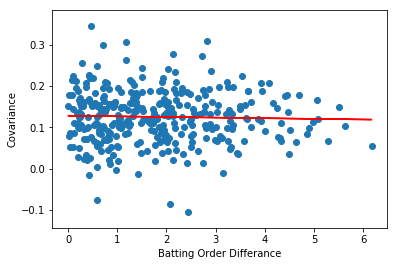

In [7]:
plt.scatter(NewList['BO Differance'], NewList['Cov'])
plt.xlabel("Batting Order Differance")
plt.ylabel("Covariance")
MeanCov = np.mean(NewList['Cov'])
m,b = np.polyfit(NewList['BO Differance'], NewList['Cov'], 1)
plt.plot(NewList['BO Differance'], m*NewList['BO Differance']+b, c='r')
print('m: %f b = %f' %(m,b))

m: 0.210684 b = 0.068310


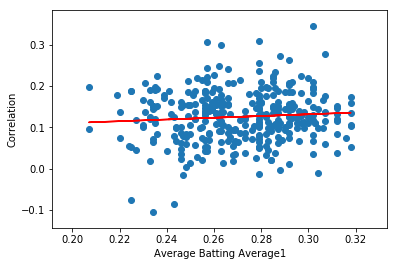

In [8]:
plt.scatter(NewList['BAvg1'], NewList['Cov'])
plt.xlabel("Average Batting Average1")
plt.ylabel("Correlation")
m,b = np.polyfit(NewList['BAvg1'], NewList['Cov'], 1)
plt.plot(NewList['BAvg1'], m*NewList['BAvg1']+b, c='r')
print('m: %f b = %f' %(m,b))

m: 0.087843 b = 0.102050


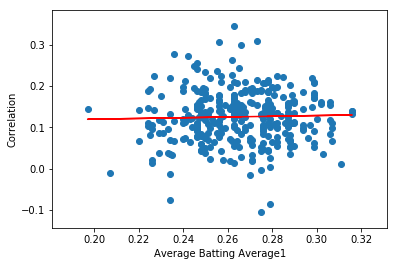

In [9]:
plt.scatter(NewList['BAvg2'], NewList['Cov'])
plt.xlabel("Average Batting Average1")
plt.ylabel("Correlation")
m,b = np.polyfit(NewList['BAvg2'], NewList['Cov'], 1)
plt.plot(NewList['BAvg2'], m*NewList['BAvg2']+b, c='r')
print('m: %f b = %f' %(m,b))

(array([  3.,   1.,  15.,  51.,  87., 101.,  57.,  17.,   5.,   3.]),
 array([-0.10599843, -0.0608299 , -0.01566137,  0.02950716,  0.0746757 ,
         0.11984423,  0.16501276,  0.21018129,  0.25534982,  0.30051835,
         0.34568688]),
 <a list of 10 Patch objects>)

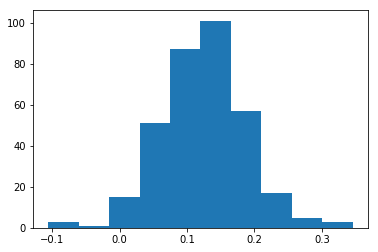

In [10]:
plt.hist(NewList['Cov'])

In [11]:
from sklearn import linear_model

In [12]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = np.array([NewList['BAvg1'].values, NewList['BAvg2'].values, NewList['BO Differance'].values])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
...     X.T, NewList['Cov'].values, test_size=0, random_state=42)

In [16]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
regr.coef_

array([ 0.21009176,  0.08794302, -0.00119284])

In [18]:
regr.intercept_

0.04733912857485628

In [19]:
np.mean(NewList['Cov'])

0.12529720530832059

In [20]:
NewList['Cov'].shape

(340,)